<a href="https://colab.research.google.com/github/crpytoscooby/College/blob/master/ML_Assignment_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Regression_Data_set_Batch1.csv - Regression_Data_set_Batch1.csv (1).csv")


In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [4]:
data=data.replace('yes',1)

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,1,2,1,furnished
1,12250000,8960,4,4,4,1,no,no,no,1,3,no,furnished
2,12250000,9960,3,2,2,1,no,1,no,no,2,1,semi-furnished
3,12215000,7500,4,2,2,1,no,1,no,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,no,1,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
#replacing yes value by 1 and no value by 0
data=data.replace('no',0)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


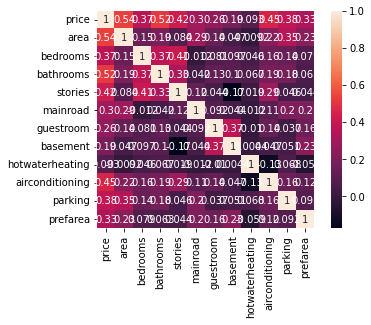

In [6]:
#correlation matrix
ax = sns.heatmap(data.corr(), square = True, annot=True)

In [ ]:
#Defining p and q values
p=data[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']]
q=data[['price']]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.25,random_state=0)

In [ ]:
lr=LinearRegression()

In [ ]:
#fitting data into regression
reg=lr.fit(p_train,q_train)

In [ ]:
#predicting q values 
py_pred=lr.predict(p_test)

In [ ]:
py_pred[0:5]

array([[3739574.72606521],
       [5997301.87363613],
       [4395522.4994253 ],
       [7061306.57155737],
       [3000534.72513986]])

Defining q values

In [ ]:

q_test.head()

,price
239,4585000
113,6083000
325,4007500
66,6930000
479,2940000


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(q_test,py_pred)

950738169770.7928

Root mean squared error

In [ ]:

from math import sqrt
rms = sqrt(mean_squared_error(q_test,py_pred))

In [ ]:
rms

975058.0340527393

In [ ]:
#Accuracy of the dataset
lr.score(p_test,q_test)

0.6919673944442734

In [ ]:
print("Coefficient",lr.coef_)

Coefficient [[2.52369689e+02 1.56312307e+05 9.93658574e+05 4.43302586e+05
  5.53927472e+05 4.98372568e+05 3.58554701e+05 1.24099090e+06
  8.91534240e+05 2.55619141e+05 6.68538238e+05]]


In [ ]:
print("Intercept",lr.intercept_)

Intercept [-428651.31076166]


Plotting Regression Plots

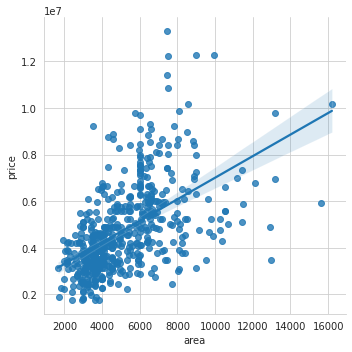

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='area', y ='price', data = data)

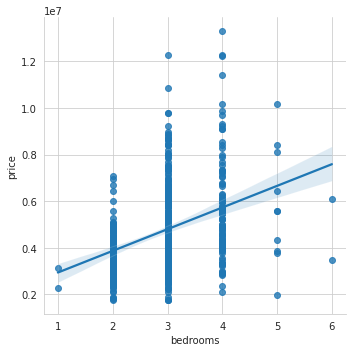

In [ ]:
sns.lmplot(x ='bedrooms', y ='price', data = data)

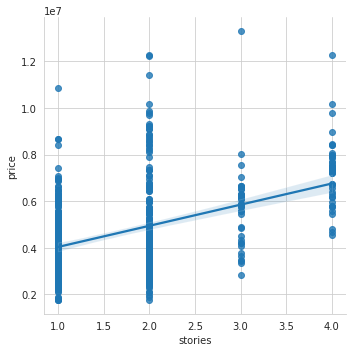

In [ ]:
sns.lmplot(x ='stories', y ='price', data = data)

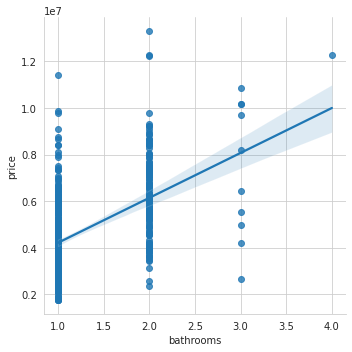

In [ ]:
sns.lmplot(x ='bathrooms', y ='price', data = data)

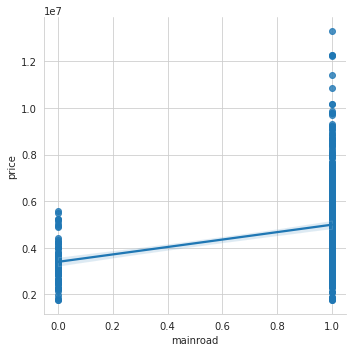

In [ ]:
sns.lmplot(x ='mainroad', y ='price', data = data)

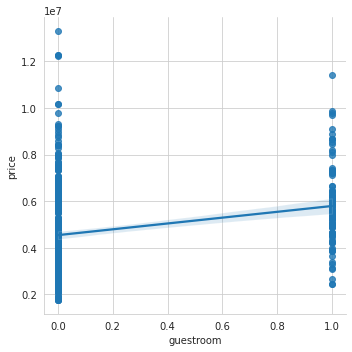

In [ ]:
sns.lmplot(x ='guestroom', y ='price', data = data)

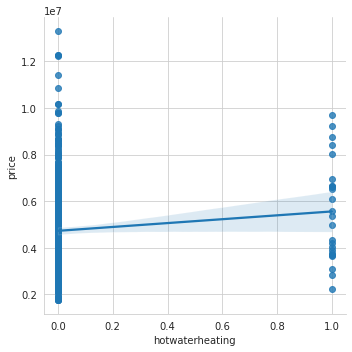

In [ ]:
sns.lmplot(x ='hotwaterheating', y ='price', data = data)

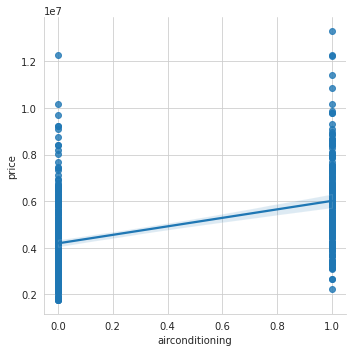

In [ ]:
sns.lmplot(x ='airconditioning', y ='price', data = data)

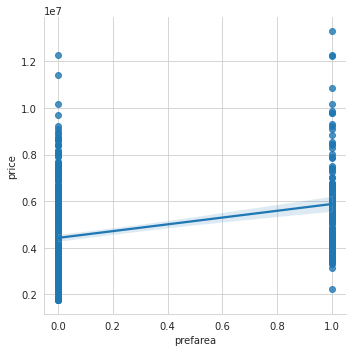

In [ ]:
sns.lmplot(x ='prefarea', y ='price', data = data)

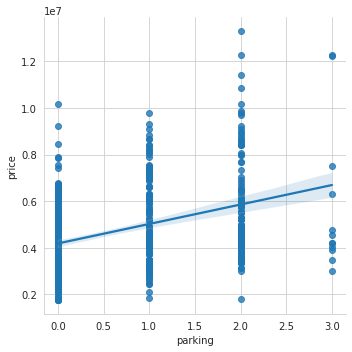

In [ ]:
sns.lmplot(x ='parking', y ='price', data = data)

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

In [ ]:
clf=sm.OLS(q_train,p_train).fit()
print(clf.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              750.6
Date:                Fri, 01 Oct 2021   Prob (F-statistic):                   7.70e-258
Time:                        07:34:01   Log-Likelihood:                         -6257.3
No. Observations:                 408   AIC:                                  1.254e+04
Df Residuals:                     397   BIC:                                  1.258e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------